# Customer segmentation

In this project, we try to use a classification machine learning algorithm to provide a segmentation of a consumer credit card portfolio aiming to predict clients loyalty or attrition.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
def plot_confusion_matrix(y,y_predict):
    # this function plots the confusion matrix
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax);
    ax.set_xlabel("Predicted labels")
    ax.set_ylabel("True labels")
    ax.set_title("Confusion Matrix"); 
    ax.xaxis.set_ticklabels(["Attrited Customer", "Existing Customer"]); ax.yaxis.set_ticklabels(["Attrited Customer", "Existing Customer"]) 
    plt.show() 

In [3]:
dataset_file = ".CSV files\\BankChurners.csv"

df = pd.read_csv(dataset_file)

In [4]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
df.shape

(10127, 23)

In [6]:
# No need to handle missing values (cero)
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [7]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


# Visualization

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64 
------------------------------- 
Percentage of Blue: 93.18%, Platinum: 0.2%


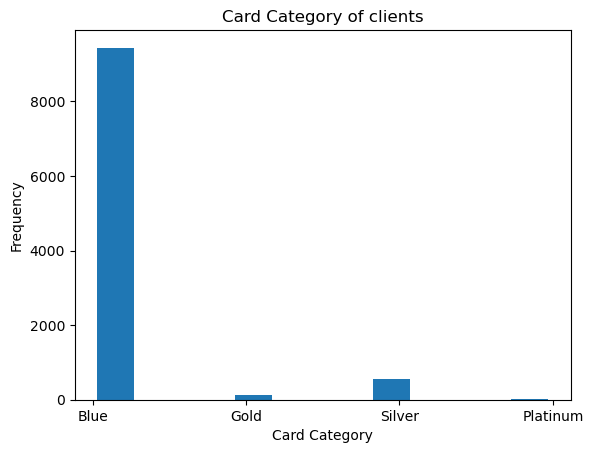

In [8]:
data = df["Card_Category"]

pr_blue = round(data.value_counts()["Blue"] * 100 / len(df), 2)
pr_plat = round(data.value_counts()["Platinum"] * 100 / len(df), 2)
print(f"{data.value_counts()} \n"
       "------------------------------- \n"
      f"Percentage of Blue: {pr_blue}%, Platinum: {pr_plat}%")

plt.hist(data, rwidth = 0.8)

plt.xlabel("Card Category")
plt.ylabel("Frequency")
plt.title("Card Category of clients")
plt.show()

We can say that most of the customers are envolved with the "Blue" plan ,being the 93.18%, and the least preferred type is "Platinum", being only the 0.2%.

In [9]:
data = df["Months_on_book"]
values = data.value_counts()
print(f"Most frequent month: {values.index[0]}, number of appearances:{max(values)}")
pr_co = round(data.value_counts()[values.index[0]]* 100 / len(df), 2)
print(f"Percentage of customers with {values.index[0]} months in the books: {pr_co}%")


Most frequent month: 36, number of appearances:2463
Percentage of customers with 36 months in the books: 24.32%


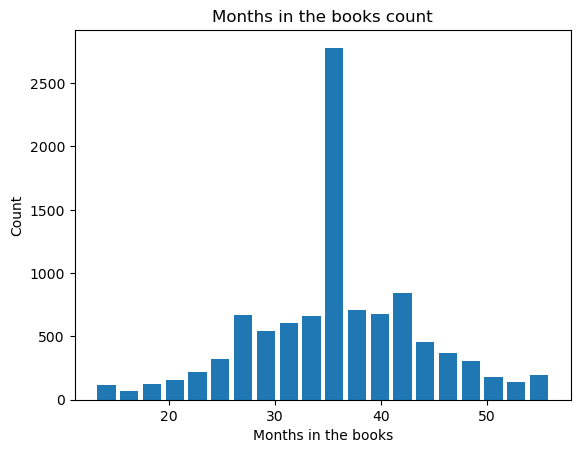

In [10]:
plt.hist(data,bins=20, rwidth = 0.8)

plt.xlabel("Months in the books")
plt.ylabel("Count")
plt.title("Months in the books count")
plt.show()

With this bar plot we visualize that most of the users of the credit card have been for 36 months in the books, in fact, 24.32% of the total clients. 

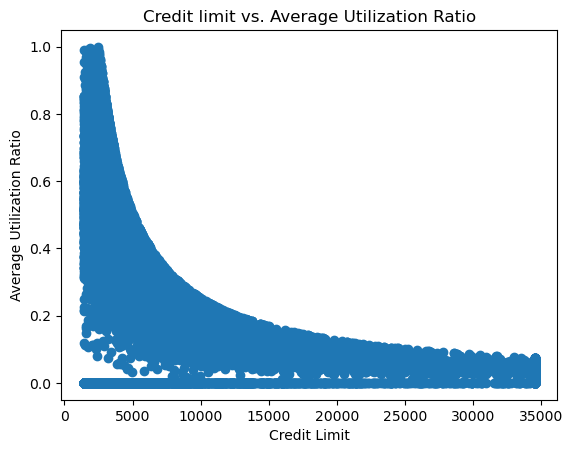

In [11]:
plt.scatter(df["Credit_Limit"],df["Avg_Utilization_Ratio"])

plt.xlabel("Credit Limit")
plt.ylabel("Average Utilization Ratio")
plt.title("Credit limit vs. Average Utilization Ratio")
plt.show()

Here we can denote an exponential relationship between Credit Limit and Average Utilization Ratio, telling us that the customers that have a low Average Utilizaton Ratio, tend to have a higher Credit Limit, showing more fiability and solvency.

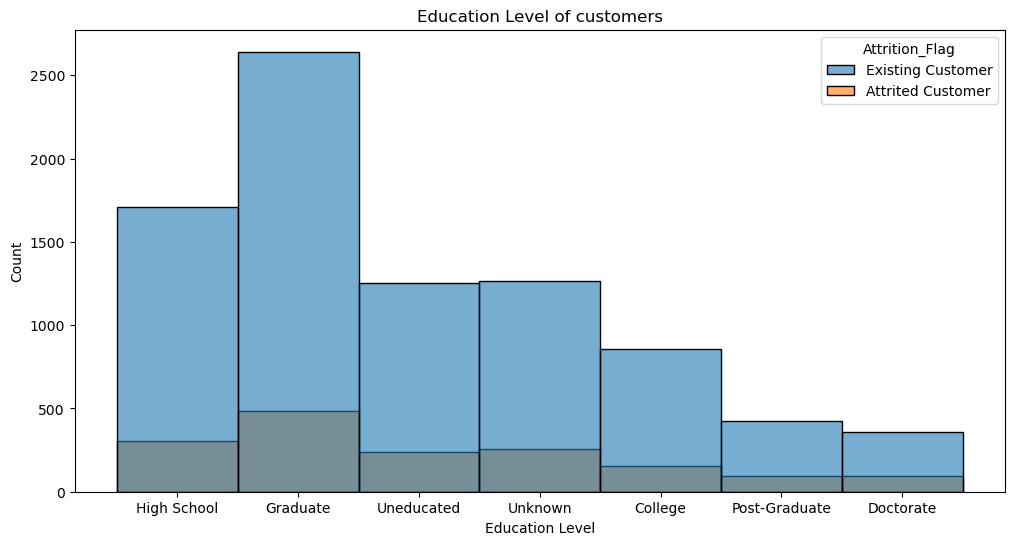

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x=df["Education_Level"], hue="Attrition_Flag", alpha=0.6)
plt.title("Education Level of customers")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

Here we can observe that most of the clients of the financial company correspond to graduated people. Customers aren't likely to be from higher education levels. 

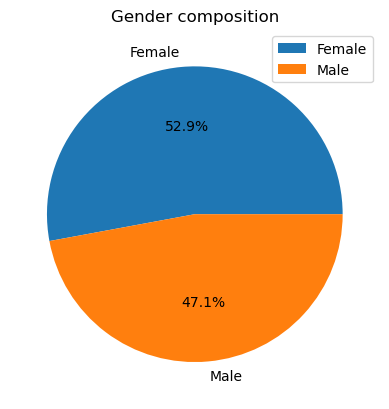

In [13]:
labels = ["Female", "Male"]
plt.pie(df["Gender"].value_counts(), labels=labels, autopct="%1.1f%%")

plt.title("Gender composition")
plt.legend()
plt.show()

# Label Encoding

In [14]:
df["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

There are a total of 8500 existing customers, and 1627 attrited customers.

In [15]:
# Encoding the different columns that are strings
str_rows = ["Attrition_Flag", "Gender", "Education_Level", "Marital_Status", "Card_Category"]

for row in str_rows:
    df[row] = pd.factorize(df[row])[0]


In [16]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,0,45,0,3,0,0,$60K - $80K,0,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,0,49,1,5,1,1,Less than $40K,0,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,0,51,0,3,1,0,$80K - $120K,0,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,0,40,1,4,0,2,Less than $40K,0,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,0,40,0,3,2,0,$60K - $80K,0,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [17]:
# We want to replace each category with the average of the range. The unknown column will be the average of all the ranges.
# The 120K+ category will be replaced by 140K and the 40K- category with 20K

cats_in = df["Income_Category"].value_counts()
print(cats_in)

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64


In [18]:
cat_list = cats_in.index.tolist()
cat_list.remove("Unknown")
cat_avg = [20000, 50000, 100000, 70000, 140000]

In [19]:
for i in range(len(cat_avg)):
    df.replace({"Income_Category":{cat_list[i]:cat_avg[i]}}, inplace=True)

df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,0,45,0,3,0,0,70000,0,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,0,49,1,5,1,1,20000,0,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,0,51,0,3,1,0,100000,0,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,0,40,1,4,0,2,20000,0,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,0,40,0,3,2,0,70000,0,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [20]:
# Calculating the average to replace the unknown category
avg = sum(cat_avg)/len(cat_avg)
df.replace({"Income_Category":{"Unknown":avg}}, inplace=True)

df["Income_Category"].value_counts()

20000.0     3561
50000.0     1790
100000.0    1535
70000.0     1402
76000.0     1112
140000.0     727
Name: Income_Category, dtype: int64

# Creating the model

In [21]:
# Dropping non important columns
X = df.drop(columns=["CLIENTNUM", "Attrition_Flag"])
Y = df["Attrition_Flag"]

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 1)

In [23]:
print(X_train.shape, X_test.shape)

(8101, 21) (2026, 21)


In [24]:
KNN = KNeighborsClassifier()

# Training
KNN.fit(X_train, Y_train)

KNeighborsClassifier()

In [25]:
# Model Evaluation

X_train_pred = KNN.predict(X_train)
train_acc = accuracy_score(X_train_pred, Y_train)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [26]:
print(f"Training data accuracy: {train_acc}")

Training data accuracy: 0.916183187260832


In [27]:
# Testing
X_test_pred = KNN.predict(X_test)
test_acc_knn = accuracy_score(X_test_pred, Y_test)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [28]:
print(f"Testing data accuracy: {test_acc_knn}")

Testing data accuracy: 0.8711747285291214


## The accuracy of the model is 87% 

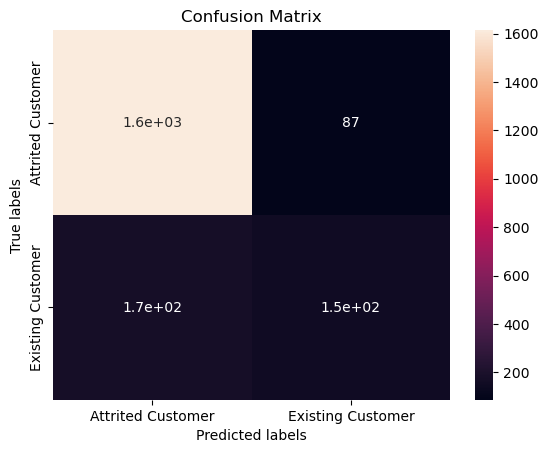

In [29]:
# Confussion matrix
plot_confusion_matrix(Y_test, X_test_pred)

# Testing other classification algorithms

In [30]:
lr = LogisticRegression()
svm = SVC()
gnb = GaussianNB()

mod_list = [lr, svm, gnb]
acc_list = []

for mod in mod_list:
    # Training
    mod.fit(X_train, Y_train)

    X_train_pred = mod.predict(X_train)
    train_acc = accuracy_score(X_train_pred, Y_train)
    print(f"Training data accuracy of {mod}: {train_acc}")

    # Testing
    X_test_pred = mod.predict(X_test)
    test_acc = accuracy_score(X_test_pred, Y_test)
    print(f"Testing data accuracy of {mod}: {test_acc}\n")
    acc_list.append(str(test_acc))

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training data accuracy of LogisticRegression(): 0.8652018269349463
Testing data accuracy of LogisticRegression(): 0.8548864758144127

Training data accuracy of SVC(): 0.8392791013455129
Testing data accuracy of SVC(): 0.8395853899308984

Training data accuracy of GaussianNB(): 0.9469201333168744
Testing data accuracy of GaussianNB(): 0.9471865745310958



In [31]:
mod_list.append(KNN)
acc_list.append(test_acc_knn)

dict_acc = {"Model": mod_list, "Accuracy": acc_list}
df_acc = pd.DataFrame(dict_acc)

In [32]:
df_acc

,Model,Accuracy
0,LogisticRegression(),0.8548864758144127
1,SVC(),0.8395853899308984
2,GaussianNB(),0.9471865745310958
3,KNeighborsClassifier(),0.871175


## As we can see in dataframe above, the model with the most accuracy (94,7%) is Gaussian Naïve Bayes, this is graphically shown in the barplot below

In [33]:
df_acc["Model"] = df_acc["Model"].astype(str)
df_acc["Accuracy"] = df_acc["Accuracy"].astype(float).round(2)

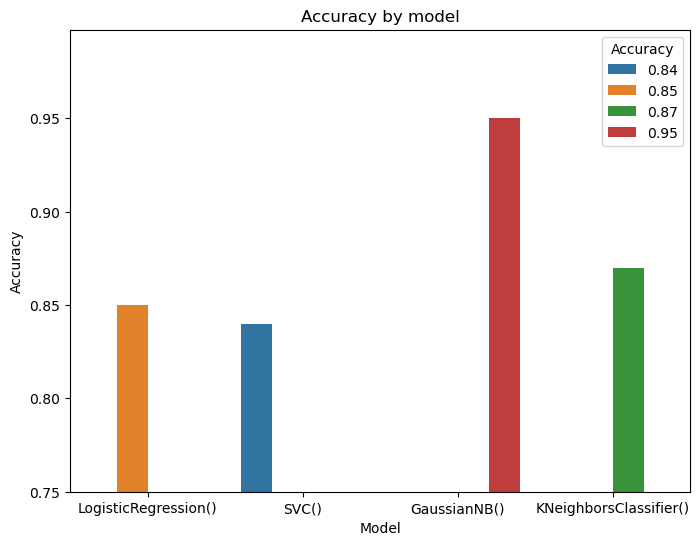

In [34]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df_acc, x="Model", y="Accuracy", hue="Accuracy")
plt.ylim(0.75, None)
plt.title("Accuracy by model")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()
